In [145]:
import jieba
import requests
import json
import numpy as np
from wordcloud import WordCloud

In [146]:
seg_list = jieba.cut("在非洲，每六十秒，就有一分鐘過去") 
print("|".join(seg_list))

在|非洲|，|每|六十|秒|，|就|有|一分|鐘過|去


In [147]:
list_req = requests.get("https://graph.facebook.com/v2.12/DoctorKoWJ/posts?access_token=EAACEdEose0cBALyZCna06WytlMGvM4SXvZBaZA00h5QXwmRAlGxnqihlZBuHGwB69YhMVWV0tkBic3HsNYQ64hl2ZCZBjGWizA6ZCkTDHAOXcE2PyuXf9I91eGvnqCGscvbCqQ9LcRI5amayacSD0Y1kri2qpAR4i9EpHYEVN0A7BwSUtCwRzlundSZCWAi4McZA2IyAHaG0ZCoQZDZD")

In [148]:
d = json.loads(list_req.text)
print(d['data'][0])
print(d['data'][0]['message'])

KeyError: 'data'

In [ ]:
def dic_find(d, dic_vector, key_word = ''):
    #print(d)
    symbol = ['，', '。', '：', '？', '！', '的', '（', '）', '、']

    for article in range(len(d['data'])):
        #print(d['data'][article])
        try:
            seg_list = jieba.cut(d['data'][article]['message']) 
            string_list = "|".join(seg_list).split('|')

            print(key_word)
            if(key_word not in string_list):
                print("not key_word")
                continue
            print("have key_word")
            for s in string_list:
                if not (s in dic_vector.keys()):
                    if (s not in symbol):
                        dic_vector[s] = 1
                else:
                    dic_vector[s] += 1
        except:
            print('no message')
    
    return dic_vector

In [ ]:
div_vector = {}

In [151]:
def key_word_find(key_word):
    symbol = ['，', '。', '：', '？', '！', '的', '（', '）', '、']
    div_vector = {}
    key_word = key_word
    div_vector.clear()
    first_link = "https://graph.facebook.com/v2.12/DoctorKoWJ/posts?access_token=EAACEdEose0cBALiZAHZCdF30UD16i9QXiXTq86i702gjN1wGg0DgZAVn65FAwlQ0DdoIcngbdOcaldoLJ7ZAw4MjbZBxk18uXhTObdadCykGIWLhX71k9iVormEMvaEidcbrYZCGU4vk9VHNVd3We22nk1qdYeUTgbmqZBYbzfIF2kiAq4DBkrqGzDlmpfRpyIZD"
    list_req = requests.get(first_link)
    d = json.loads(list_req.text)
    div_vector = dic_find(d, div_vector)
    try:
        while(1):
            print("next page!!")
            list_link = d['paging']['next']
            list_req = requests.get(list_link)
            #print("\n\n\n")
            #print(list_link)
            d = json.loads(list_req.text)
            div_vector = dic_find(d, div_vector)
    except:    
        print('final')
    
    return div_vector

In [152]:
div_1 = key_word_find('車站')
#div_2, count_2 = key_word_find('海芋')


not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word
next page!!

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word
next page!!

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_word

not key_w

In [153]:
def remove_word(div_vector):
    single_list = list()
    for word in div_vector.keys():
        if (len(word) == 1):
            single_list.append(word)

    for x in single_list:
        div_vector.pop(x, None)

    remove_list = ['市府','台灣','因此','goo','社會','我們','大家','問題','一個','就是','今天','因為','不是','這個','希望','可以','台北','台北市','https','一起','自己','透過','如果','應該','http','需要','現有','他們']
    for x in remove_list:
        div_vector.pop(x, None)
    
    return div_vector

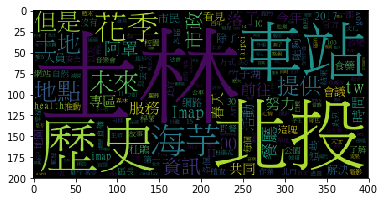

In [154]:
import matplotlib.pyplot as plt
font = "/Library/Fonts/Microsoft/mingliu_hkscs.ttf"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(remove_word(div_1))
plt.imshow(wordcloud)
plt.show()

In [150]:
div_1

{}